In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
df.head(5)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,Super convenient to almost all subway lines. A...,Your room has a very comfortable queen sized b...,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                33538 non-null  int64  
 1   name                              33526 non-null  object 
 2   summary                           32266 non-null  object 
 3   space                             23038 non-null  object 
 4   description                       33230 non-null  object 
 5   experiences_offered               33538 non-null  object 
 6   neighborhood_overview             19948 non-null  object 
 7   notes                             13447 non-null  object 
 8   transit                           20796 non-null  object 
 9   access                            19304 non-null  object 
 10  interaction                       18670 non-null  object 
 11  house_rules                       19983 non-null  object 
 12  host

In [4]:
def convert_tf(x):
    if x == 't':
        return 1
    elif x =='f':
        return 0
    else:
        pass
df['host_is_superhost'] = df['host_is_superhost'].apply(convert_tf)

In [5]:
df['host_is_superhost']

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
33533    0.0
33534    0.0
33535    0.0
33536    0.0
33537    0.0
Name: host_is_superhost, Length: 33538, dtype: float64

In [6]:
df['market'].value_counts()

New York                       33425
Other (Domestic)                  10
Catskills and Hudson Valley        2
Los Angeles                        2
Adirondacks                        2
Boston                             1
San Francisco                      1
Jamaica South Coast                1
New Orleans                        1
Agra                               1
Paris                              1
Kyoto                              1
Name: market, dtype: int64

In [7]:
df.select_dtypes(include=['int', 'float']).drop(columns=['id', 'host_id'])

,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,NaN,0.0,1.0,2,1.0,1.0,1.0,NaN,145,2,...,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.59
1,NaN,0.0,4.0,8,1.0,3.0,5.0,NaN,175,3,...,137,91.0,9.0,9.0,9.0,9.0,9.0,9.0,3,2.47
2,NaN,0.0,1.0,2,1.0,0.0,1.0,NaN,180,1,...,3,100.0,10.0,9.0,9.0,10.0,10.0,10.0,1,0.89
3,NaN,0.0,1.0,1,1.0,1.0,1.0,NaN,42,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,NaN,1.0,1.0,2,1.0,1.0,1.0,NaN,80,1,...,144,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,NaN,0.0,1.0,2,1.0,1.0,1.0,NaN,110,1,...,19,87.0,9.0,8.0,9.0,9.0,9.0,8.0,1,0.44
33534,NaN,0.0,3.0,8,3.0,4.0,4.0,NaN,1195,1,...,86,95.0,10.0,9.0,10.0,10.0,10.0,9.0,1,2.28
33535,NaN,0.0,1.0,1,NaN,1.0,1.0,NaN,50,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
33536,NaN,0.0,4.0,2,1.0,1.0,1.0,NaN,60,1,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3,0.10


In [8]:
baseline_features =['accommodates',
                    'bathrooms',
                    'bedrooms',
                    'beds',
                    'guests_included',
                    'number_of_reviews',
                    'reviews_per_month',
                    'neighbourhood_group_cleansed',
                    'room_type',
                    'host_is_superhost',
                    'property_type'
                   ]


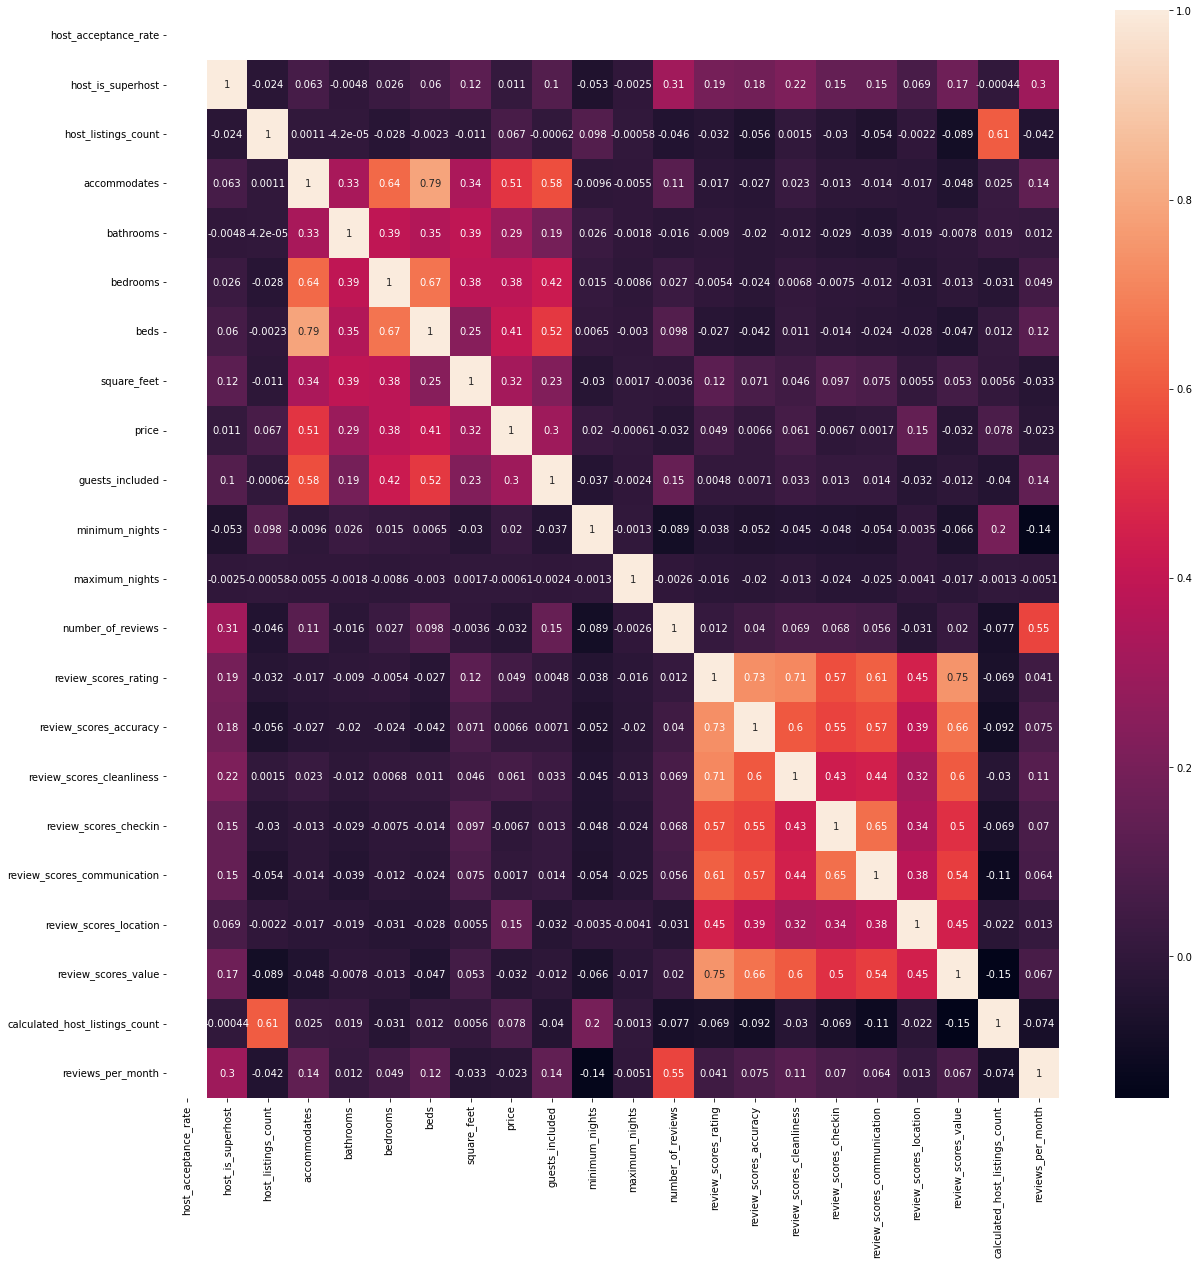

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create a sample dataframe
plt.figure(figsize=(20,20))
# calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['int', 'float']).drop(columns=['id', 'host_id']).corr()

# plot the correlation heatmap
sns.heatmap(corr_matrix, annot=True)

# show the plot
plt.show()

<AxesSubplot:>

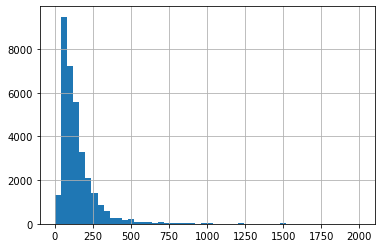

In [10]:
df['price'].hist(bins = 50)

In [11]:
considering_features = ['host_is_superhost', 'state' ,'country', 'property_type', 'accommodates', 'bedrooms', 'number_of_reviews', 
           'review_scores_rating']

In [12]:
basic_feature = ['host_is_superhost', 'state' , 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'accommodates']

for bf in basic_feature:
    print(bf +": " ,df[bf].unique(), df[bf].dtype)


host_is_superhost:  [ 0.  1. nan] float64
state:  ['NY' 'Ny' 'New York' nan 'MP' 'NJ' 'ny' 'CA'] object
bedrooms:  [ 1.  3.  0.  2.  5.  4. nan  6.  9.  7.  8. 10.] float64
number_of_reviews:  [  6 137   3   0 144  12   1  30   2  10 118 173  16   8  66  29 171 108
 157  47  27  19 127  24   7  25  70  31  17 107  11  41 102   4 104  84
  85 134   5  76  73   9 167  22  83  72 313  14  35  23  45 153 142  68
  20 208  91  13  26  50  42  88  21  92  98  18  89  52  40  36 103  59
  15 176  28  44  55  53 106  32  43  57  64  58  69 213  38  51 205 156
 121 113 123  78  56  39  49  95 128 146 115  65 135 166  34  37  75 241
  97  67 162  63 226 120  93 125  90  33  71 177 112  74 151 129 141 109
 204  86  99 187 277 193 150 139 184 138  81 296 110 100  46 170 278 212
 119  54  96 169 229  87  62 246  82  60 131  61 333 161 154 230 168 221
 209 111 190 197 207  80 114 155 165 132 158  48 305 195 174 116 101 200
  94 317 202  77  79 244 273 206 201 194 266 242 140 149 240 243 186 303
 145

<AxesSubplot:>

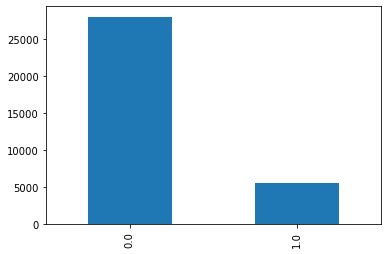

In [13]:
df['host_is_superhost'].value_counts().plot(kind='bar')

<AxesSubplot:>

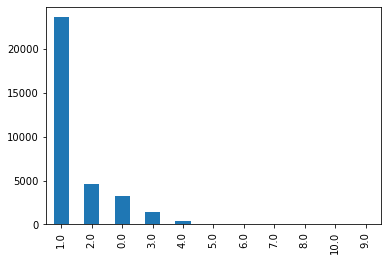

In [14]:
df['bedrooms'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

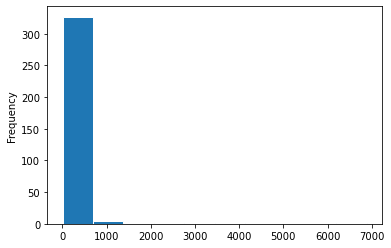

In [15]:
df['number_of_reviews'].value_counts().plot(kind='hist', ec= 'w')

<AxesSubplot:ylabel='Frequency'>

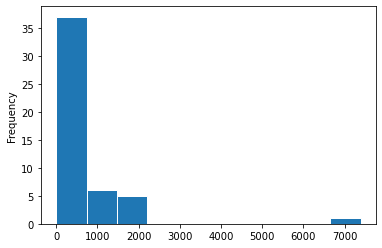

In [16]:
df['review_scores_rating'].value_counts().plot(kind='hist', ec= 'w')

<AxesSubplot:>

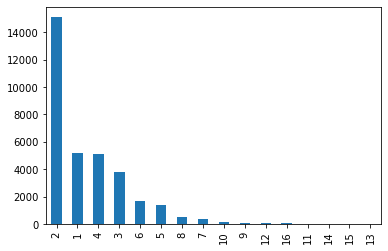

In [17]:
df['accommodates'].value_counts().plot(kind='bar')

In [18]:
df.select_dtypes(include=['int', 'float']).drop(columns=['id', 'host_id'])

,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,NaN,0.0,1.0,2,1.0,1.0,1.0,NaN,145,2,...,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.59
1,NaN,0.0,4.0,8,1.0,3.0,5.0,NaN,175,3,...,137,91.0,9.0,9.0,9.0,9.0,9.0,9.0,3,2.47
2,NaN,0.0,1.0,2,1.0,0.0,1.0,NaN,180,1,...,3,100.0,10.0,9.0,9.0,10.0,10.0,10.0,1,0.89
3,NaN,0.0,1.0,1,1.0,1.0,1.0,NaN,42,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,NaN,1.0,1.0,2,1.0,1.0,1.0,NaN,80,1,...,144,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,NaN,0.0,1.0,2,1.0,1.0,1.0,NaN,110,1,...,19,87.0,9.0,8.0,9.0,9.0,9.0,8.0,1,0.44
33534,NaN,0.0,3.0,8,3.0,4.0,4.0,NaN,1195,1,...,86,95.0,10.0,9.0,10.0,10.0,10.0,9.0,1,2.28
33535,NaN,0.0,1.0,1,NaN,1.0,1.0,NaN,50,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
33536,NaN,0.0,4.0,2,1.0,1.0,1.0,NaN,60,1,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3,0.10


In [19]:
missing = df.isna().sum()

missing /= df.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'Precent Of Missing Values'})
missing

,Precent Of Missing Values
id,0.000000
name,0.035780
summary,3.792713
space,31.307770
description,0.918361
...,...
cancellation_policy,0.000000
require_guest_profile_picture,0.000000
require_guest_phone_verification,0.000000
calculated_host_listings_count,0.000000


In [20]:
missing.loc[baseline_features]

,Precent Of Missing Values
accommodates,0.000000
bathrooms,0.178902
bedrooms,0.098396
beds,0.092432
guests_included,0.000000
number_of_reviews,0.000000
reviews_per_month,20.713817
neighbourhood_group_cleansed,0.000000
room_type,0.000000
host_is_superhost,0.014908


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

### XGB


#### Search Best param for XGBoost

In [22]:
# df['room_type']=df['room_type'].str.split('/', expand=True)[0].str.split(' ',expand=True)[0]
# df['room_type'].value_counts()

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


class Impute_Standardize(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean', fill_value=None):
        self.strategy = strategy
        self.fill_value = fill_value
        self.imputer = SimpleImputer(strategy=self.strategy,
                                     fill_value=self.fill_value)
        self.scaler = StandardScaler()
    
    def fit(self, X, y=None):
        self.imputer.fit(X)
        self.scaler.fit(X)
        return self
    
    def transform(self, X, y=None):
        X_imputed = self.imputer.transform(X)
        X_imputed = pd.DataFrame(X_imputed, columns=self.imputer.get_feature_names_out())
        X_scaled = self.scaler.transform(X_imputed)
        return X_scaled

In [93]:
preprocessor = ColumnTransformer([('ohe', OneHotEncoder(),
                              ('neighbourhood_group_cleansed', 'room_type','property_type','host_is_superhost')),
                             
                             ('imp-mode', SimpleImputer(strategy='most_frequent'),
                              ('bathrooms', 'bedrooms', 'beds')),
                             
                             ('imp-mean', Impute_Standardize(strategy='mean'),
                              ('review_scores_accuracy')),
                             
                             ('imp-cons', SimpleImputer(strategy='constant', fill_value=0),
                              ('reviews_per_month')),
                            
                             ('std', StandardScaler(), ('accommodates',
                                                        'guests_included',
                                                        'number_of_reviews'))])

In [91]:
baseline_features =['accommodates',
                    'bathrooms',
                    'bedrooms',
                    'beds',
                    'guests_included',
                    'number_of_reviews',
                    'reviews_per_month',
                    'neighbourhood_group_cleansed',
                    'room_type',
                    'host_is_superhost',
                    'property_type',
                    'review_scores_accuracy'
                   ]

In [95]:
one_hot_features = ['neighbourhood_group_cleansed', 
                    'room_type',
                    'property_type',
                    'host_is_superhost',
                    'bathrooms',
                    'bedrooms',
                    'beds']


impute_standardize_mean = ['review_scores_accuracy']

simple_imputer = ['reviews_per_month']

standard_scaler = ['accommodates',
                   'guests_included',
                   'number_of_reviews']

In [105]:
df_x, df_y = df.drop(columns=['price']), df['price']


one_hot_features = ['neighbourhood_group_cleansed', 'room_type', 'property_type',
                    'host_is_superhost', 'bathrooms', 'bedrooms', 'beds']

impute_standardize_mean = ['review_scores_accuracy']
simple_imputer = ['reviews_per_month']
standard_scaler = ['accommodates', 'guests_included', 'number_of_reviews']

one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

impute_standardize_mean_transformer = Pipeline(steps=[
    ('imputer', Impute_Standardize(strategy='mean'))
])

simple_imputer_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant'))
])

standard_scaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('ohe', one_hot_transformer, one_hot_features),
    ('ism', impute_standardize_mean_transformer, impute_standardize_mean),
    ('si', simple_imputer_transformer, simple_imputer),
    ('ss', standard_scaler_transformer, standard_scaler)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBRegressor())
])

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': range(50, 200, 10),
    'classifier__max_depth': range(3, 10),
    'classifier__colsample_bytree': [0.5, 0.7, 1],
    'classifier__gamma': [0, .25, 1.0],
    'classifier__subsample': [0.5, 0.7, 1],
    'classifier__reg_lambda': [0, 1.0, 10.0]
}


random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    n_jobs=-1
)

# random_search.fit(X_train, y_train)

# print('Best parameters:', random_search.best_params_)
# print('Best score:', -random_search.best_score_)


In [114]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
                      
one_hot_features = ['neighbourhood_group_cleansed', 
                    'room_type',
                    'property_type',
                    'host_is_superhost',
                    'bathrooms',
                    'bedrooms',
                    'beds']

impute_standardize_mean = ['review_scores_accuracy']

simple_imputer = ['reviews_per_month']

standard_scaler = ['accommodates',
                   'guests_included',
                   'number_of_reviews']

df_x, df_y = df.drop(columns=['price']), df['price']

one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

impute_standardize_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

simple_imputer_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant'))
])

standard_scaler_transformer = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('imputer', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('ohe', one_hot_transformer, one_hot_features),
    ('ism', impute_standardize_mean_transformer, impute_standardize_mean),
    ('si', simple_imputer_transformer, simple_imputer),
    ('ss', standard_scaler_transformer, standard_scaler)
])

# preprocessor.fit_transform(df)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBRegressor())
])

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': range(50, 200, 10),
    'classifier__max_depth': range(3, 10),
    'classifier__colsample_bytree': [0.5, 0.7, 1],
    'classifier__gamma': [0, .25, 1.0],
    'classifier__subsample': [0.5, 0.7, 1],
    'classifier__reg_lambda': [0, 1.0, 10.0]
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print('Best parameters:', random_search.best_params_)


Best parameters: {'classifier__subsample': 1, 'classifier__reg_lambda': 1.0, 'classifier__n_estimators': 120, 'classifier__max_depth': 8, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0.25, 'classifier__colsample_bytree': 0.5}


In [115]:
# best_xgb_model = Pipeline([
#     ('preproc', preprocessor),
#     ('classifier', XGBRegressor(
#         subsample= 0.7,
#         reg_lambda= 1.0, 
#         n_estimators= 80, 
#         max_depth= 5, 
#         learning_rate = 0.05, 
#         gamma = 0.25, 
#         colsample_bytree=1)
#     )
# ])

In [116]:
best_xgb_model = random_search.best_estimator_

In [117]:
df_x, df_y = df.drop(columns=['price']), df['price']

# split the data into training and testing sets
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)


# Fit the pipeline to the training data
best_xgb_model.fit(xgb_X_train, xgb_y_train)

xgb_y_pred_train = best_xgb_model.predict(xgb_X_train)
print('train_RMSE', mean_squared_error(xgb_y_pred_train, xgb_y_train)**0.5)

xgb_y_pred_test = best_xgb_model.predict(xgb_X_test)
print('test_RMSE', mean_squared_error(xgb_y_pred_test, xgb_y_test)**0.5)

train_RMSE 78.69322389542123
test_RMSE 95.10140155751522


In [118]:
best_xgb_model.fit(df_x,df_y)

xgb_y_pred = best_xgb_model.predict(df_x)
print('train_RMSE', mean_squared_error(xgb_y_pred, df_y)**0.5)


train_RMSE 80.2805870671499


#### Apply on Test set

In [119]:
test = pd.read_csv('test.csv')
test.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1,20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",...,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48
2,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.37
3,13079990,Spacius private room in Brooklyn,"Newly renovated apartment, its a 3 bedroom apa...","3 bedroom apartment, 1 full bathroom, living r...","Newly renovated apartment, its a 3 bedroom apa...",none,NaN,NaN,"There is the Mta 3 train Sutter stop, also the...",NaN,...,9.0,8.0,9.0,f,f,flexible,f,f,1,0.23
4,22339757,*Dg) Delightful Private Room 20 min to Manhattan,Hi my home is only 2 blocks from the subway st...,NaN,Hi my home is only 2 blocks from the subway st...,none,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,t,f,strict_14_with_grace_period,f,f,9,1.53


In [120]:
xgb_y_pred = best_xgb_model.predict(df_x)
print('train_RMSE', mean_squared_error(xgb_y_pred, df_y)**0.5)

train_RMSE 80.2805870671499


In [121]:
xgb_df_predict_y = best_xgb_model.predict(test)
output_df = pd.DataFrame()
output_df['Id'] = test['id']
output_df['Predicted'] = xgb_df_predict_y
output_df.to_csv('xgb_prediction.csv', index = False)

### RandomForest

In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### Search Best Param_

In [158]:
# df_x, df_y = df.drop(columns=['price']), df['price']

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('ohe', categorical_transformer, baseline_features)
# ])

# rf_model = Pipeline([
#     ('preproc', preprocessor),
#     ('classifier', RandomForestRegressor())
# ])

# param_grid = {
#     'classifier__n_estimators': [10, 50, 100],
#     'classifier__max_depth': [None, 10, 20],
# }

# random_search = RandomizedSearchCV(
#     rf_model,
#     param_distributions=param_grid,
#     n_iter=10,
#     cv=5,
#     n_jobs=-1,
#     random_state=42
# )

# random_search.fit(df_x, df_y)

# print(random_search.best_params_)

In [154]:
df_x, df_y = df.drop(columns=['price']), df['price']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('ohe', categorical_transformer, baseline_features)
])

rf_model = Pipeline([
    ('preproc', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=50,max_depth=10))
])

# split the data into training and testing sets
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
rf_model.fit(rf_X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'guests_included',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'neighbourhood_group_cleansed',
                                                   'room_type'])])),
                ('classi

In [157]:
rf_y_pred_train = rf_model.predict(rf_X_train)
print('train_RMSE', mean_squared_error(rf_y_pred_train, rf_y_train)**0.5)

rf_y_pred_test = rf_model.predict(rf_X_test)
print('test_RMSE', mean_squared_error(rf_y_pred_test, rf_y_test)**0.5) 

train_RMSE 84.37952399596651
test_RMSE 99.68500273229499
